<a href="https://colab.research.google.com/github/fedhere/FDSFE_FBianco/blob/main/ClassDemos/ANN/FDSfA_titanicDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


# 0.1 reading data from kaggle

In [ ]:
pip install kaggle

In [ ]:
!kaggle --version

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


## create a file kaggle.json by requesting and API key to kaggle (under account)
## https://www.kaggle.com/docs/api
## and upload it to your google drive.
## Upload and read in the credential, store them as environmental variables

### Before class
Please register for an account at kaggle.com, all the work we will do together in class as well as your next homework will require it.
To register do the following:
- go to kaggle.com
- click on “Register” in the upper right corner
select either Register with Google, or Register with your email (it’s up to you)
- follow the instructions provided by kaggle to create an account (enter your email address, create a password, and choose a username), all of which are up to you, this will be your account after all
- Make sure that at the end, you have an account that you can log in with, and be logged in and ready next class

### In class

- Go to https://www.kaggle.com/ and sign in
- click on the icon of your avatar on the top right
- select account from the drop menu
- scroll down to API and click `create New API Token`. This will download a json file on your computer
- open google drive at https://drive.google.com/drive/u/0/my-drive in your browser
-  upload the kaggle.json file from your laptop to the drive


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


make sure the file is there: this cell should return "kaggle.json"

In [ ]:
ls kaggle.json

kaggle.json


the next cell changes who can access this file. Tokens are a seriously private thing! they are used to access sites. If someone were to hack the kaggle site and steal information from the user using your token you would be legally responsible for that! So keep your files secret. Don't share them with any one, don't print the content of the json file we use in your notebook.

In [ ]:
!chmod 600 kaggle.json

In [ ]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = "e60b57c215e877e01a22375a3058eec1"#envs['key']

In [ ]:
#check that it worked by listing the kaggle datasets
!kaggle competitions list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 70, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 713, in competitions_list_cli
    competitions = self.competitions_list(group=group,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 693, in competitions_list
    return [Competition(c) for c in competitions_list_result]
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 693, in <listcomp>
    return [Competition(c) for c in competitions_list_result]
  File "/usr/local/lib/python3.10/dist-packages/kaggle/models/kaggle_models_extended.py", line 42, in __init__
    parsed_dict = {k: parse(v) for k, v in init_dict.items()}
AttributeError: 'str' object has no attribute 'items'


create a directory for these data


In [ ]:
!mkdir kaggleTitanic

mkdir: cannot create directory ‘kaggleTitanic’: File exists


move to that directory


In [ ]:
cd kaggleTitanic

/content/gdrive/My Drive/kaggleTitanic


download the titanic data into the directory you created for it

In [ ]:
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 70, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 997, in competition_download_cli
    self.competition_download_files(competition, path, force,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 960, in competition_download_files
    url = response.retries.history[0].redirect_location.split('?')[0]
IndexError: tuple index out of range


In [ ]:
!ls

gender_submission.csv  test.csv  TitanicTree  TitanicTree.pdf  titanic.zip  train.csv


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

read in the data

In [ ]:
titanic = pd.read_csv("train.csv")

In [ ]:
pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/HW6/train.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 0.2 data cleaning and wrangling

### turn gender into numeric

In [ ]:
titanic["gender"] = titanic.Sex.map({'male':0, 'female':1})

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [ ]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic["embarked"] = titanic.Embarked.map({'S':0, 'C':1, 'Q':2})

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1.0


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  gender       891 non-null    int64  
 13  embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'gender', 'embarked'],
      dtype='object')

In [ ]:
titanic_clean = titanic[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch',  'Fare', 'gender', 'embarked']].dropna()
titanic_clean.shape

(712, 8)

In [ ]:
titanic_clean.iloc[:, 1:]

,Pclass,Age,SibSp,Parch,Fare,gender,embarked
0,3,22.0,1,0,7.2500,0,0.0
1,1,38.0,1,0,71.2833,1,1.0
2,3,26.0,0,0,7.9250,1,0.0
3,1,35.0,1,0,53.1000,1,0.0
4,3,35.0,0,0,8.0500,0,0.0
...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,1,2.0
886,2,27.0,0,0,13.0000,0,0.0
887,1,19.0,0,0,30.0000,1,0.0
889,1,26.0,0,0,30.0000,0,1.0


In [ ]:
from sklearn.preprocessing import scale
titanic_scaled = scale(titanic_clean.iloc[:, 1:])
titanic_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split

In [ ]:
X = titanic_scaled
y = titanic_clean["Survived"]
X, y

(array([[ 0.90859974, -0.52766856,  0.52251079, ..., -0.51637992,
         -0.75613751, -0.50122573],
        [-1.48298257,  0.57709388,  0.52251079, ...,  0.69404605,
          1.32251077,  1.41744481],
        [ 0.90859974, -0.25147795, -0.55271372, ..., -0.50362035,
          1.32251077, -0.50122573],
        ...,
        [-1.48298257, -0.73481151, -0.55271372, ..., -0.08633507,
          1.32251077, -0.50122573],
        [-1.48298257, -0.25147795, -0.55271372, ..., -0.08633507,
         -0.75613751,  1.41744481],
        [ 0.90859974,  0.16280796, -0.55271372, ..., -0.50692839,
         -0.75613751,  3.33611536]]),
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 712, dtype: int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=302, test_size=0.2)

In [ ]:
y_train.shape, y_test.shape

((569,), (143,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(7,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
57/57 [==============================] - 1s 3ms/step - loss: 0.6534 - accuracy: 0.6678
Epoch 2/150
57/57 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.6837
Epoch 3/150
57/57 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.7083
Epoch 4/150
57/57 [==============================] - 0s 3ms/step - loss: 0.5427 - accuracy: 0.7276
Epoch 5/150
57/57 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7504
Epoch 6/150
57/57 [==============================] - 0s 3ms/step - loss: 0.5096 - accuracy: 0.7610
Epoch 7/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.7891
Epoch 8/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4857 - accuracy: 0.7979
Epoch 9/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.8049
Epoch 10/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.7996
Epoch 11/

In [ ]:
history.history

{'loss': [0.6534076929092407,
  0.5979537963867188,
  0.5662766695022583,
  0.5426799654960632,
  0.5252255797386169,
  0.5095610618591309,
  0.49644505977630615,
  0.48565077781677246,
  0.47690582275390625,
  0.4692918062210083,
  0.4621995687484741,
  0.4565974473953247,
  0.45222947001457214,
  0.4470726251602173,
  0.44248175621032715,
  0.43934205174446106,
  0.4343716502189636,
  0.4312829375267029,
  0.4292769432067871,
  0.427081823348999,
  0.4238339960575104,
  0.4206559658050537,
  0.41897454857826233,
  0.4175169765949249,
  0.4151875972747803,
  0.4131692945957184,
  0.41049695014953613,
  0.40884849429130554,
  0.4074098765850067,
  0.40608593821525574,
  0.4047313928604126,
  0.40275317430496216,
  0.4010956287384033,
  0.3997483551502228,
  0.3982328176498413,
  0.3965670168399811,
  0.3945789933204651,
  0.39322757720947266,
  0.3920226991176605,
  0.39210256934165955,
  0.3897635042667389,
  0.3892653286457062,
  0.3889899253845215,
  0.3872550129890442,
  0.38681539

Text(0, 0.5, 'loss')

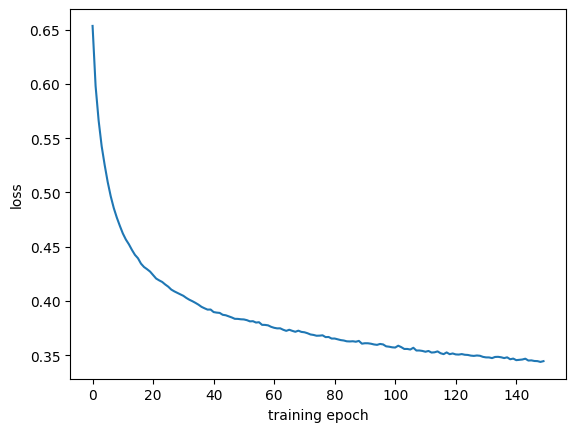

In [ ]:
plt.plot(history.history["loss"])
plt.xlabel("training epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

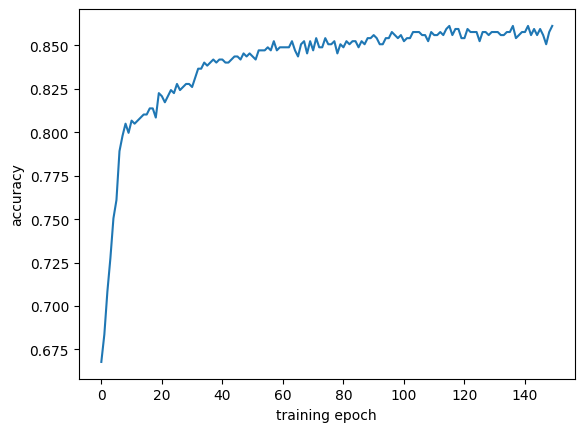

In [ ]:
plt.plot(history.history["accuracy"])
plt.xlabel("training epoch")
plt.ylabel("accuracy")

In [ ]:
model.predict(X_test) > 0

5/5 [==============================] - 0s 7ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'D33', 'B30', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'D47', 'B86',
       'F2', 'C2', 'B19', 'A7', 'C49', 'F4', 'B4', 'B80', 'A31', 'D36',
       'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'B49', 'D', 'C22 C26', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'E33', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52',
       'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'E12', 'E63', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
       'C90', 'C126', 'C45', 'E8', 'B101', 'C46', 'D30', 'E121', 'D11',
       'E

In [ ]:
titanic["embarked"] = titanic.Embarked.map({'S':0, 'C':1, 'Q':2})

### throw away data that you will not use

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'gender'],
      dtype='object')

In [ ]:
titanic_selected = titanic[['Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'embarked', 'gender', 'Survived']]

titanic_selected

,Pclass,Age,SibSp,Parch,Fare,embarked,gender,Survived
0,3,22.0,1,0,7.2500,0.0,0,0
1,1,38.0,1,0,71.2833,1.0,1,1
2,3,26.0,0,0,7.9250,0.0,1,1
3,1,35.0,1,0,53.1000,0.0,1,1
4,3,35.0,0,0,8.0500,0.0,0,0
...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,2.0,1,0
886,2,27.0,0,0,13.0000,0.0,0,0
887,1,19.0,0,0,30.0000,0.0,1,1
889,1,26.0,0,0,30.0000,1.0,0,1


In [ ]:
titanic_selected = titanic_selected.dropna()

In [ ]:
titanic_selected.iloc[:,:-1]

,Pclass,Age,SibSp,Parch,Fare,embarked,gender
0,3,22.0,1,0,7.2500,0.0,0
1,1,38.0,1,0,71.2833,1.0,1
2,3,26.0,0,0,7.9250,0.0,1
3,1,35.0,1,0,53.1000,0.0,1
4,3,35.0,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,2.0,1
886,2,27.0,0,0,13.0000,0.0,0
887,1,19.0,0,0,30.0000,0.0,1
889,1,26.0,0,0,30.0000,1.0,0


In [ ]:
import sklearn.preprocessing as sklp
X_scaled = sklp.scale(titanic_selected.iloc[:,:-1])
X_scaled.mean(axis=0)

array([-1.39713459e-16,  2.94396218e-16, -1.49692992e-17,  1.49692992e-17,
       -6.73618464e-17, -8.98157953e-17,  3.74232480e-17])

In [ ]:
train_test_split?

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_scaled, titanic_selected.iloc[:,-1], test_size = 0.2)

In [ ]:
# first neural network with keras make predictions
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
# split into input (X) and output (y) variables



# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(7,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)


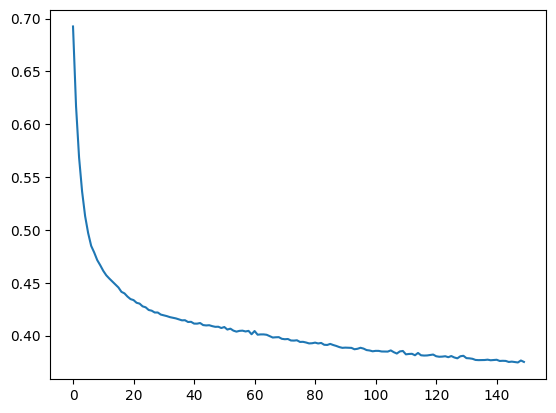

In [ ]:
plt.plot(history.history["loss"])

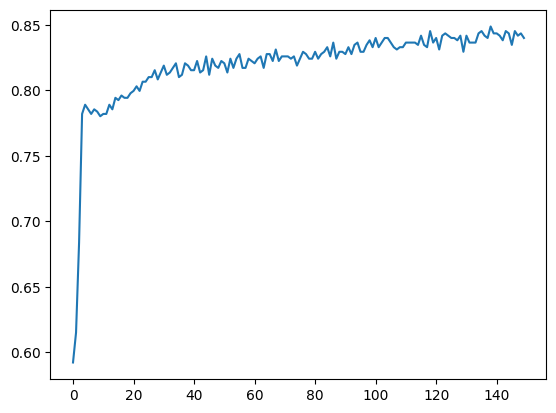

In [ ]:
plt.plot(history.history["accuracy"])

In [ ]:
model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


array([[0.34581813],
       [0.07316461],
       [0.06232307],
       [0.04520972],
       [0.7101817 ],
       [0.04803807],
       [0.33325303],
       [0.46307477],
       [0.97398406],
       [0.2759907 ],
       [0.4432694 ],
       [0.08161935],
       [0.11167326],
       [0.9003744 ],
       [0.17494273],
       [0.91301167],
       [0.9265021 ],
       [0.11022244],
       [0.9771546 ],
       [0.25154087],
       [0.95788103],
       [0.1271756 ],
       [0.07672486],
       [0.11156078],
       [0.38160938],
       [0.77917457],
       [0.05416833],
       [0.17354564],
       [0.20182586],
       [0.4005994 ],
       [0.3004083 ],
       [0.37097105],
       [0.40892684],
       [0.05036284],
       [0.07160283],
       [0.16206734],
       [0.7745791 ],
       [0.07189268],
       [0.96641845],
       [0.35622784],
       [0.72307754],
       [0.91320693],
       [0.9681345 ],
       [0.25596547],
       [0.5441168 ],
       [0.13918489],
       [0.27983192],
       [0.375

In [ ]:
model.predict(X_test) > 0.5

5/5 [==============================] - 0s 7ms/step


array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
(model.predict(X_test) > 0.5).astype(int)

5/5 [==============================] - 0s 12ms/step


array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [ ]:
# make class predictions with the model
predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
# summarize the first 5 cases
for i in range(5):
  print('%s => %d (expected %d)' % (i, y_test.to_list()[i], predictions[i]))

5/5 [==============================] - 0s 4ms/step
0 => 0 (expected 0)
1 => 0 (expected 0)
2 => 0 (expected 0)
3 => 0 (expected 0)
4 => 1 (expected 1)


{'True Positives (TP)': 35, 'False Positives (FP)': 7, 'True Negatives (TN)': 81, 'False Negatives (FN)': 20}


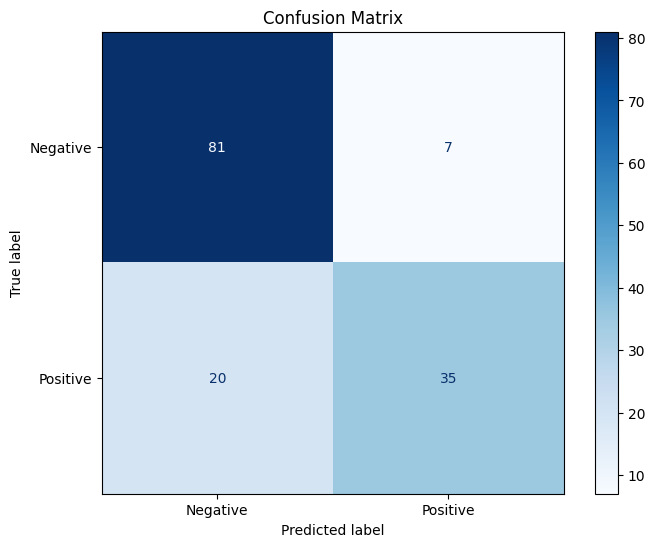

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def generate_confusion_matrix(y_true, y_pred):
    """
    Generate a confusion matrix for a binary classifier.

    Parameters:
    - y_true: List or array of true labels (0 or 1)
    - y_pred: List or array of predicted labels (0 or 1)

    Returns:
    - A dictionary containing true positives (TP), false positives (FP),
      true negatives (TN), and false negatives (FN).
    """
    if len(y_true) != len(y_pred):
        raise ValueError("Input lists must have the same length.")

    # Calculate confusion matrix values
    cm = confusion_matrix(y_true, y_pred)

    # Create and return the confusion matrix dictionary
    confusion_matrix_dict = {
        'True Positives (TP)': cm[1, 1],
        'False Positives (FP)': cm[0, 1],
        'True Negatives (TN)': cm[0, 0],
        'False Negatives (FN)': cm[1, 0]
    }
    confusion_matrix_dict_rate['True Positives (TPR)']  = confusion_matrix_dict['True Positives (TP)'] / y_true.sum()
    confusion_matrix_dict_rate['False Positives (FPR)']  = confusion_matrix_dict['True Positives (TP)'] /  (y_true == 0).sum()
    confusion_matrix_dict_rate['True Negative (TNR)']  = confusion_matrix_dict['True Positives (TP)'] / (y_true == 0).sum()
    confusion_matrix_dict_rate['False Negative (FNR))']  = confusion_matrix_dict['True Positives (TP)'] / y_true.sum()


    return confusion_matrix_dict, confusion_matrix_dict_rate

def plot_confusion_matrix(y_true, y_pred, labels=['Negative', 'Positive'], rate=False):
    """
    Plot the confusion matrix for a binary classifier.

    Parameters:
    - y_true: List or array of true labels (0 or 1)
    - y_pred: List or array of predicted labels (0 or 1)
    - labels: List of class labels (default: ['Negative', 'Positive'])
    """
    cm = confusion_matrix(y_true, y_pred)

    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    # Plotting the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    display.plot(cmap='Blues', ax=ax)
    plt.title('Confusion Matrix')
    plt.show()


result = generate_confusion_matrix(y_test.to_list(), predictions)
print(result)

plot_confusion_matrix(y_test.to_list(), predictions)

